In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicHermiteSpline

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Laura Camila Rios Quintero
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



In [ ]:
# Polinomio de interpolacion de Lagange
x = [0,np.pi/2,np.pi] # puntos x

y = [0,1,0]     # sen(x), puntos y

Poly_lagrange = lagrange(x,y)    # Polinomio de lagrange

print(Poly_lagrange)

         2
-0.4053 x + 1.273 x


In [ ]:
def error_lagrange(x_, f):

    n = len(x_)      # Orden n de la función
    df = sp.diff(f,x,n)        # derivada n de la funcón
    df = sp.lambdify(x,df)

    x_interp = np.linspace(min(x_), max(x_),100)
    error = np.zeros(len(x_interp))

    for j in range(len(x_interp)):
        prod = 1

        for k in range(n):
            prod*= (x_interp[j]-x_[k])

        error[j] = 1/mt.factorial(n+1)*df(x_interp[j])*prod

    return error


In [ ]:
x = sp.Symbol('x')
x_val = np.array([0,np.pi/2,np.pi])
f = sp.sin(x)

error_lagrange(x_val, f)

array([-0.00000000e+00, -6.32531128e-03, -1.22448333e-02, -1.77503634e-02,
       -2.28359811e-02, -2.74979861e-02, -3.17348318e-02, -3.55470532e-02,
       -3.89371903e-02, -4.19097079e-02, -4.44709094e-02, -4.66288491e-02,
       -4.83932389e-02, -4.97753535e-02, -5.07879315e-02, -5.14450744e-02,
       -5.17621439e-02, -5.17556562e-02, -5.14431758e-02, -5.08432072e-02,
       -4.99750865e-02, -4.88588715e-02, -4.75152325e-02, -4.59653424e-02,
       -4.42307676e-02, -4.23333594e-02, -4.02951465e-02, -3.81382290e-02,
       -3.58846735e-02, -3.35564110e-02, -3.11751358e-02, -2.87622081e-02,
       -2.63385585e-02, -2.39245962e-02, -2.15401197e-02, -1.92042316e-02,
       -1.69352573e-02, -1.47506669e-02, -1.26670022e-02, -1.06998073e-02,
       -8.86356434e-03, -7.17163381e-03, -5.63619959e-03, -4.26821929e-03,
       -3.07737965e-03, -2.07205731e-03, -1.25928492e-03, -6.44722812e-04,
       -2.32636250e-04, -2.58782761e-05, -2.58782761e-05, -2.32636250e-04,
       -6.44722812e-04, -

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [ ]:
# Error para los polinomios de Hermite

def error_hermite(x_,f):

    n = len(x_)
    df_n= sp.diff(f,x,2*n + 2)
    df_n = sp.lambdify(x,df_n)
    x_interp = np.linspace(min(x_), max(x_),100)
    error = np.zeros(len(x_interp))

    for j in range(len(x_interp)):
        prod = 1

        for i in range(n):
            prod*= (x_interp[j]-x_[i])**2

        error[j] = 1/mt.factorial(2*n +2)*df_n(x_interp[j])*prod

    return error

In [ ]:
x = sp.Symbol('x')
x_val = np.array([0,np.pi/2,np.pi])
f = sp.sin(x)

error_hermite(x_val, f)

array([0.00000000e+00, 1.81528559e-08, 1.36399037e-07, 4.31755779e-07,
       9.58440924e-07, 1.75042782e-06, 2.82392528e-06, 4.17977016e-06,
       5.80572150e-06, 7.67864635e-06, 9.76658865e-06, 1.20307140e-05,
       1.44271242e-05, 1.69085363e-05, 1.94258237e-05, 2.19294151e-05,
       2.43705510e-05, 2.67023981e-05, 2.88810203e-05, 3.08662102e-05,
       3.26221822e-05, 3.41181321e-05, 3.53286662e-05, 3.62341060e-05,
       3.68206741e-05, 3.70805680e-05, 3.70119279e-05, 3.66187077e-05,
       3.59104551e-05, 3.49020111e-05, 3.36131368e-05, 3.20680755e-05,
       3.02950602e-05, 2.83257760e-05, 2.61947844e-05, 2.39389214e-05,
       2.15966759e-05, 1.92075588e-05, 1.68114709e-05, 1.44480768e-05,
       1.21561955e-05, 9.97321119e-06, 7.93451579e-06, 6.07298586e-06,
       4.41850260e-06, 2.99751923e-06, 1.83268083e-06, 9.42501087e-07,
       3.41099202e-07, 3.80001275e-08, 3.80001275e-08, 3.41099202e-07,
       9.42501087e-07, 1.83268083e-06, 2.99751923e-06, 4.41850260e-06,
      

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
# polinomio de Lagrange

Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

polinomio_lagrange = lagrange(Energia,sigma_exp)

# Polinomio de Newton
polinomio_newton = BarycentricInterpolator(Energia, sigma_exp)

#Polinomio de hermite
derivada = np.gradient(sigma_exp,Energia)
polinomio_hermite = CubicHermiteSpline(Energia,sigma_exp,derivada)


Polinomio de lagrange             8             7             6             5             4
-1.155e-13 x + 9.976e-11 x - 3.543e-08 x + 6.631e-06 x - 0.0006943 x
            3         2
 + 0.03955 x - 1.093 x + 11.41 x + 10.6
Polinomio de newton <scipy.interpolate._polyint.BarycentricInterpolator object at 0x78159b654780>
Polinomio de hermite <scipy.interpolate._cubic.CubicHermiteSpline object at 0x78159b0c89b0>


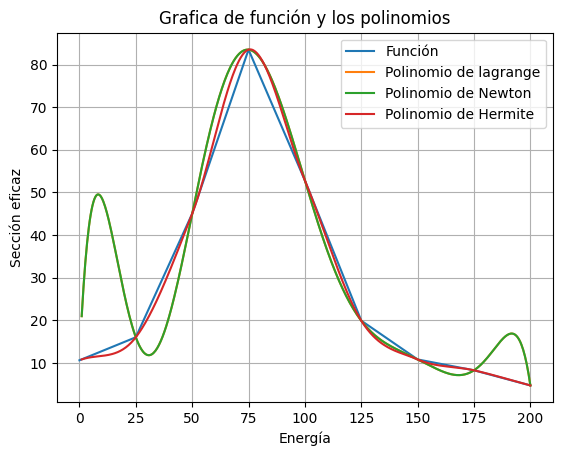

In [ ]:
# Grafica
valores_x = np.linspace(1,200,500)
plt.plot(Energia,sigma_exp,label = 'Función')
plt.plot(valores_x,polinomio_lagrange(valores_x), label= 'Polinomio de lagrange')
plt.plot(valores_x,polinomio_newton(valores_x), label='Polinomio de Newton')
plt.plot(valores_x, polinomio_hermite(valores_x),label='Polinomio de Hermite')
plt.xlabel('Energía')
plt.ylabel('Sección eficaz')
plt.legend()
plt.title('Grafica de función y los polinomios')
plt.grid()
plt.show()

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

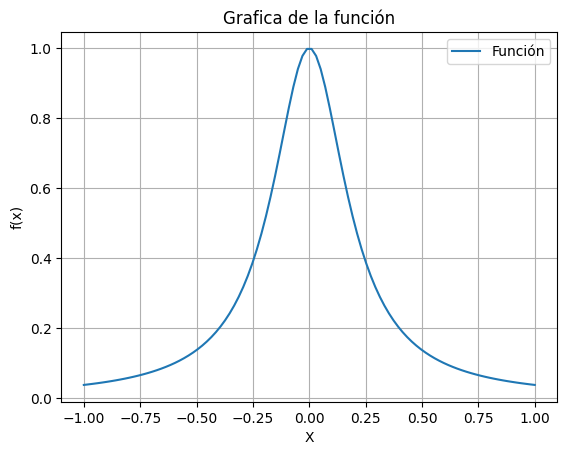

In [ ]:
f = lambda x: 1/(1+ 25*(x**2))   #2 Función
x = np.linspace(-1,1,100)

plt.plot(x,f(x),label='Función')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('Grafica de la función')
plt.grid(True)
plt.legend()
plt.show()

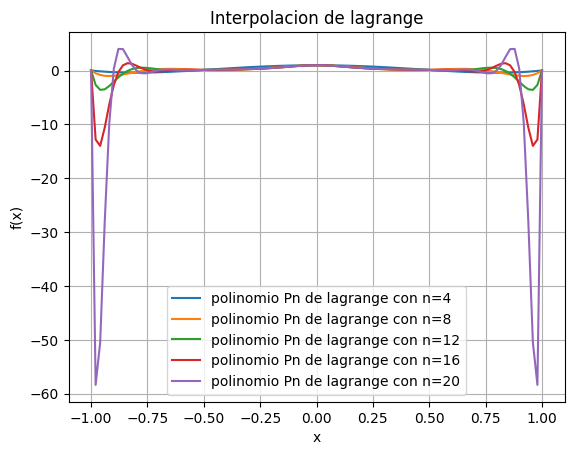

In [ ]:
n = [4,8,12,16,20]   # Valores de n

for i in n:

    x_ = np.linspace(-1,1,i+1)        # Intervalo con n valores
    y = f(x_)

    poli_lagrange = lagrange(x_,y)         #polinomio de lagrange
    interp = poli_lagrange(x)
    plt.plot(x, interp, label=f'polinomio Pn de lagrange con n={i}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Interpolacion de lagrange')
plt.grid()
plt.show()

In [ ]:
#Error para n = 4 y x = 0.5
def error_(x_, f):

    n = 5
    x = 0.5     # Orden n = 5 de la función
    df = sp.diff(f,x,n)        # derivada n de la funcón
    df = sp.lambdify(x,df)


    for i in x_:
        prod = 1
        prod*= (x-x_[i])

    error = 1/mt.factorial(n+1)*df(6)*prod
    return error

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



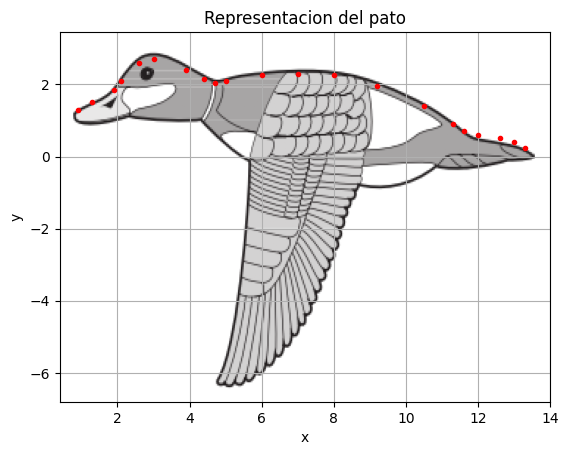

In [2]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [6]:

derivadas = np.gradient(yp,xp)    # Para el polinomio de hermite

polino_lagrange = lagrange(xp,yp) # Polinomio de lagrange
polino_hermite = CubicHermiteSpline(xp,yp,derivadas)

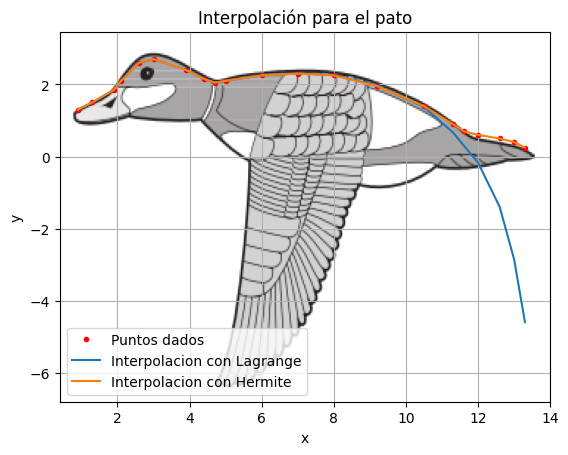

In [10]:
# Representacion de los puntos

plt.figure()
plt.title('Interpolación para el pato')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos dados')
plt.plot(xp, polino_lagrange(xp), label = 'Interpolacion con Lagrange')
plt.plot(xp, polino_hermite(xp), label = 'Interpolacion con Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

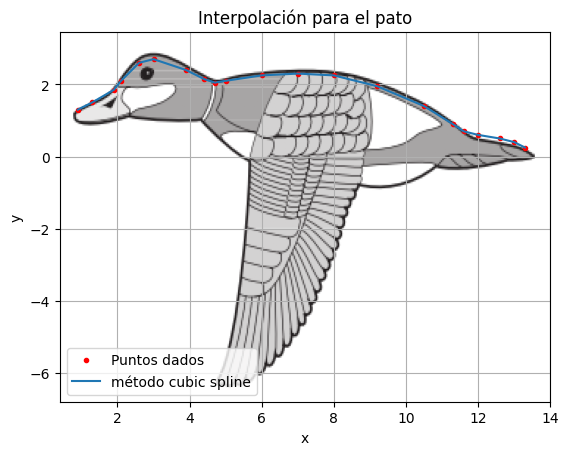

In [11]:
# con spline cubicos

spline = CubicSpline(xp,yp)

plt.figure()
plt.title('Interpolación para el pato')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos dados')
plt.plot(xp,spline(xp), label = 'método cubic spline')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()